<a href="https://colab.research.google.com/github/GrigoryBartosh/dul_2021/blob/main/Homework/hw15/Homework15_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import random

import numpy as np
import torch

from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST

from models.hw15 import show_imgs, ContDDPM, Clf, CondContDDPM

In [2]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Data

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((16, 16)),
    transforms.Normalize((0.5), (0.5)),
])

In [5]:
train_data = MNIST(root='./data/', train=True, download=True, transform=transform)
val_data = MNIST(root='./data/', train=False, download=True, transform=transform)

In [6]:
BATCH_SIZE = 128

In [7]:
train_loader = DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2,
    drop_last=True
)
val_loader = DataLoader(
    val_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=2,
    drop_last=True
)

# Question 1. DDPM

В этом задание вам предлагается реализовать диффузную модель с непрерывным временем на основе DDPM. Технический код уже написан, нужно лишь восстановить содержательные функции.

## Experiment

In [8]:
model = ContDDPM().to(device)
model.fit(train_loader, val_loader, epochs=15, lr=2e-4)

train: 12.0724 | val: 11.8371: 100%|██████████| 15/15 [04:26<00:00, 17.80s/it]


100%|██████████| 1000/1000 [00:10<00:00, 99.10it/s] 
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


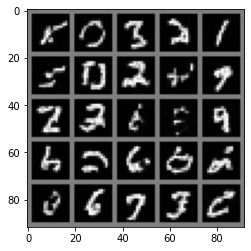

In [9]:
samples = model.sample_sde(bs=25)
show_imgs(samples)

неправильно расписан сэмлинг? Лоссы падают...

# Bonus. Conditional generation

На паре мы обсуждали возможность делать условную генерацию с помощью диффузных моделей (см. презентацию, слайд 35). Бонусное задание - реализовать генерацию с условием на класс. Для этого нужно:

*   Обучить безусловную генерацию из первого задания
*   Обучить классификатор обусловленный на время
*   Собрать все вместе



In [10]:
clf = Clf(4).to(device)
model = CondContDDPM(clf).to(device)


In [11]:
model.fit(train_loader, val_loader, epochs=15, lr=2e-4)

train: 12.5245 | val: 12.2877: 100%|██████████| 15/15 [04:16<00:00, 17.10s/it]


100%|██████████| 1000/1000 [00:11<00:00, 87.47it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


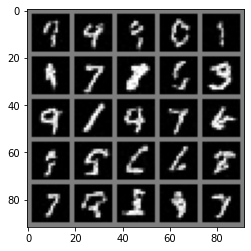

In [12]:
# before clf is fitted
samples = model.sample_sde(bs=25, target=0)
show_imgs(samples)

In [13]:
clf.fit(train_loader, val_loader, epochs=100)

Train loss: None | test loss 2.313824415206909


Train loss: 1.4892680644989014 | test loss 1.4765275716781616: 100%|██████████| 100/100 [08:30<00:00,  5.11s/it]


100%|██████████| 1000/1000 [00:11<00:00, 88.46it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


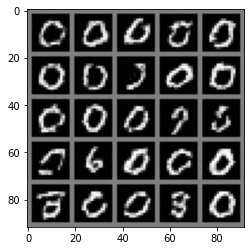

In [14]:
# after clf is fitted
samples = model.sample_sde(bs=25, target=0)
show_imgs(samples)